In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/yessm/Downloads/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.isnull().sum().sum()
print(df["view"].value_counts())

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [3]:
#Soustraction de la date et suppression de la partie inutile 
def get_title(txt):
 data=txt[:-7]
 return data
    

In [4]:
get_title(df["date"][24])

'20141120'

In [5]:
df["date"]=df["date"].apply(get_title)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
print ("les données les plus important sont le nombre des bedrooms , bathrooms,la surface du living ,floors , latitude longitude   ")

les données les plus important sont le nombre des bedrooms , bathrooms,la surface du living ,floors , latitude longitude   


In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


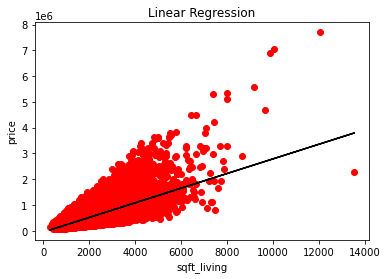

In [62]:
plt.scatter(x.reshape(x.shape[0]),list(y),color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(df["sqft_living"],model.predict(x),color="k")
plt.show()

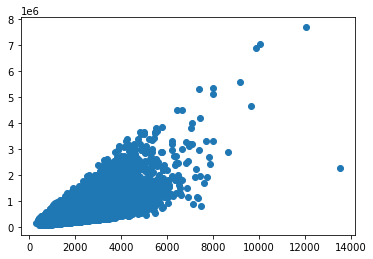

In [57]:
plt.scatter(df['sqft_living'],df['price'])

In [58]:
import seaborn as sns

C:\Users\yessm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

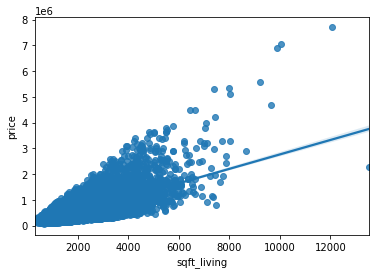

In [59]:
sns.regplot(df['sqft_living'],df['price'])

In [56]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
x.reshape(x.shape[0])

array(['20141013', '20141209', '20150225', ..., '20140623', '20150116',
       '20141015'], dtype=object)

In [7]:
x=df[["bedrooms","bathrooms","floors","grade","sqft_living","lat","long"]]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 46944363685.86953
R squared 0.6265885636887552


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
# create matrix and vectors
x=df["date"].values[:,np.newaxis]
y=df["price"].values
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(x)
print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:  [['20141013']
 ['20141209']
 ['20150225']
 ...
 ['20140623']
 ['20150116']
 ['20141015']]
x after transformation:  [[1.00000000e+00 2.01410130e+07 4.05660405e+14]
 [1.00000000e+00 2.01412090e+07 4.05668300e+14]
 [1.00000000e+00 2.01502250e+07 4.06031568e+14]
 ...
 [1.00000000e+00 2.01406230e+07 4.05644695e+14]
 [1.00000000e+00 2.01501160e+07 4.06027175e+14]
 [1.00000000e+00 2.01410150e+07 4.05660485e+14]]


LinearRegression()